<a href="https://colab.research.google.com/github/shweta-mahalingam/Decision-Tree-model_New-drugs/blob/main/DecisionTreeClassifier(For_novel_drug_molecules)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
path='/content/drive/MyDrive/Colab Notebooks/DATASET.xlsx'
my_data = pd.read_excel(path)

my_data.head()

Mounted at /content/drive


,S.NO.,DRUG NAME,AI_RANKING,ASSAY,CIRCUIT_INTER,CONDITION,GENE_EXPRESSION,KNOWLEDGE_INTER,PHENOTYPE,SIDE_EFFECTS,SYMPTOM,TARGET,DL_11,CLASS
0,1,PENTAMIDINE,4.49,0,1.0,0,1.0,0.0,0,1,0,1,1,0
1,2,POLYMYXIN B,11.65,0,0.0,0,0.0,0.0,0,1,0,0,0,0
2,3,PROGUANIL,4.78,3,0.0,0,1.0,0.0,0,1,0,1,0,0
3,4,PYRIMETHAMINE,8.91,3,1.0,0,1.0,0.0,0,1,0,1,0,0
4,5,RANITIDINE,8.89,1,0.0,0,1.0,0.0,0,1,1,1,0,0


In [ ]:
my_data.isnull().sum()

S.NO.               0
DRUG NAME           0
AI_RANKING         44
ASSAY               0
CIRCUIT_INTER       1
CONDITION           0
GENE_EXPRESSION     1
KNOWLEDGE_INTER    23
PHENOTYPE           0
SIDE_EFFECTS        0
SYMPTOM             0
TARGET              0
DL_11               0
CLASS               0
dtype: int64

In [ ]:
my_data.groupby('DRUG NAME')['AI_RANKING'].mean()

DRUG NAME
ABACAVIR        5.77
ABAFUNGIN        NaN
ABAMETAPIR       NaN
ABEMACICLIB      NaN
ABIRATERONE     3.93
               ...  
VALDECOXIB      7.06
VALSARTAN       9.86
VIDUPIPRANT      NaN
VILANTEROL     11.81
VORINOSTAT      5.09
Name: AI_RANKING, Length: 99, dtype: float64

In [ ]:
my_data['AI_RANKING']=my_data['AI_RANKING'].transform(lambda x: x.fillna(x.mean()))
my_data

,S.NO.,DRUG NAME,AI_RANKING,ASSAY,CIRCUIT_INTER,CONDITION,GENE_EXPRESSION,KNOWLEDGE_INTER,PHENOTYPE,SIDE_EFFECTS,SYMPTOM,TARGET,DL_11,CLASS
0,1,PENTAMIDINE,4.490000,0,1.0,0,1.0,0.0,0,1,0,1,1,0
1,2,POLYMYXIN B,11.650000,0,0.0,0,0.0,0.0,0,1,0,0,0,0
2,3,PROGUANIL,4.780000,3,0.0,0,1.0,0.0,0,1,0,1,0,0
3,4,PYRIMETHAMINE,8.910000,3,1.0,0,1.0,0.0,0,1,0,1,0,0
4,5,RANITIDINE,8.890000,1,0.0,0,1.0,0.0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,NICOTINE,4.420000,0,1.0,0,1.0,0.0,1,1,1,1,0,0
96,97,NIFEDIPINE,9.350000,2,1.0,0,1.0,0.0,1,1,1,1,1,0
97,98,OBERADILOL,7.598929,0,0.0,0,0.0,NaN,0,0,0,0,1,1
98,99,OXYCARBOXIN,7.598929,0,0.0,0,0.0,NaN,0,0,0,0,0,1


In [ ]:
my_data.isnull().sum()

S.NO.               0
DRUG NAME           0
AI_RANKING          0
ASSAY               0
CIRCUIT_INTER       1
CONDITION           0
GENE_EXPRESSION     1
KNOWLEDGE_INTER    23
PHENOTYPE           0
SIDE_EFFECTS        0
SYMPTOM             0
TARGET              0
DL_11               0
CLASS               0
dtype: int64

In [ ]:

my_data['CIRCUIT_INTER'] = my_data['CIRCUIT_INTER'].fillna(my_data['CIRCUIT_INTER'].mode()[0])
my_data.isnull().sum()

S.NO.               0
DRUG NAME           0
AI_RANKING          0
ASSAY               0
CIRCUIT_INTER       0
CONDITION           0
GENE_EXPRESSION     1
KNOWLEDGE_INTER    23
PHENOTYPE           0
SIDE_EFFECTS        0
SYMPTOM             0
TARGET              0
DL_11               0
CLASS               0
dtype: int64

In [ ]:
my_data['GENE_EXPRESSION'] = my_data['GENE_EXPRESSION'].fillna(my_data['GENE_EXPRESSION'].mode()[0])
my_data['KNOWLEDGE_INTER'] = my_data['KNOWLEDGE_INTER'].fillna(my_data['KNOWLEDGE_INTER'].mode()[0])
my_data.isnull().sum()
my_data.tail(10)

,S.NO.,DRUG NAME,AI_RANKING,ASSAY,CIRCUIT_INTER,CONDITION,GENE_EXPRESSION,KNOWLEDGE_INTER,PHENOTYPE,SIDE_EFFECTS,SYMPTOM,TARGET,DL_11,CLASS
90,91,VILANTEROL,11.810000,0,0.0,0,1.0,0.0,0,1,0,1,0,0
91,92,VORINOSTAT,5.090000,3,1.0,0,1.0,0.0,1,1,0,1,1,1
92,93,COLCHICINE,3.910000,3,1.0,0,1.0,0.0,1,1,1,1,1,1
93,94,MELATONIN,6.540000,3,1.0,0,1.0,0.0,1,1,1,1,0,1
94,95,MEPACRINE,7.730000,1,0.0,0,1.0,0.0,1,1,0,1,1,1
95,96,NICOTINE,4.420000,0,1.0,0,1.0,0.0,1,1,1,1,0,0
96,97,NIFEDIPINE,9.350000,2,1.0,0,1.0,0.0,1,1,1,1,1,0
97,98,OBERADILOL,7.598929,0,0.0,0,0.0,0.0,0,0,0,0,1,1
98,99,OXYCARBOXIN,7.598929,0,0.0,0,0.0,0.0,0,0,0,0,0,1
99,100,OXYCLOZANIDE,7.598929,0,0.0,0,0.0,0.0,0,0,0,0,1,1


In [ ]:
categorical_features = [feature for feature in my_data.columns if my_data[feature].dtypes == object]
categorical_features

['DRUG NAME']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
my_data[categorical_features] = my_data[categorical_features].apply(encoder.fit_transform)
my_data

,S.NO.,DRUG NAME,AI_RANKING,ASSAY,CIRCUIT_INTER,CONDITION,GENE_EXPRESSION,KNOWLEDGE_INTER,PHENOTYPE,SIDE_EFFECTS,SYMPTOM,TARGET,DL_11,CLASS
0,1,77,4.490000,0,1.0,0,1.0,0.0,0,1,0,1,1,0
1,2,82,11.650000,0,0.0,0,0.0,0.0,0,1,0,0,0,0
2,3,83,4.780000,3,0.0,0,1.0,0.0,0,1,0,1,0,0
3,4,84,8.910000,3,1.0,0,1.0,0.0,0,1,0,1,0,0
4,5,87,8.890000,1,0.0,0,1.0,0.0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,68,4.420000,0,1.0,0,1.0,0.0,1,1,1,1,0,0
96,97,69,9.350000,2,1.0,0,1.0,0.0,1,1,1,1,1,0
97,98,72,7.598929,0,0.0,0,0.0,0.0,0,0,0,0,1,1
98,99,74,7.598929,0,0.0,0,0.0,0.0,0,0,0,0,0,1


In [ ]:
x = my_data.drop(['S.NO.', 'DRUG NAME', 'CLASS'], axis = 1)
y = my_data['CLASS']
x.head()

,AI_RANKING,ASSAY,CIRCUIT_INTER,CONDITION,GENE_EXPRESSION,KNOWLEDGE_INTER,PHENOTYPE,SIDE_EFFECTS,SYMPTOM,TARGET,DL_11
0,4.49,0,1.0,0,1.0,0.0,0,1,0,1,1
1,11.65,0,0.0,0,0.0,0.0,0,1,0,0,0
2,4.78,3,0.0,0,1.0,0.0,0,1,0,1,0
3,8.91,3,1.0,0,1.0,0.0,0,1,0,1,0
4,8.89,1,0.0,0,1.0,0.0,0,1,1,1,0


In [ ]:
x.columns

Index(['AI_RANKING', 'ASSAY', 'CIRCUIT_INTER', 'CONDITION', 'GENE_EXPRESSION',
       'KNOWLEDGE_INTER', 'PHENOTYPE', 'SIDE_EFFECTS', 'SYMPTOM', 'TARGET',
       'DL_11'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(x_test)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(x_train,y_train)

    AI_RANKING  ASSAY  CIRCUIT_INTER  CONDITION  GENE_EXPRESSION  \
16    7.598929      1            0.0          0              1.0   
1    11.650000      0            0.0          0              0.0   
43    7.598929      1            1.0          0              1.0   
67    7.598929      0            0.0          0              0.0   
89    7.598929      0            0.0          0              0.0   
21   10.970000      0            0.0          1              1.0   
97    7.598929      0            0.0          0              0.0   
51    2.970000      2            1.0          0              1.0   
6    11.270000      0            0.0          0              1.0   
41   13.670000      2            0.0          0              1.0   
82    7.598929      0            0.0          0              0.0   
25    7.598929      1            1.0          0              1.0   
45    2.620000      2            0.0          0              1.0   
68    7.630000      2            0.0          0 

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
predictions_test=clf.predict(x_test)
accuracy_score(y_test, predictions_test)

0.8

In [ ]:
predictions_train = clf.predict(x_train)
accuracy_score(y_train,predictions_train)

0.9857142857142858

In [ ]:
predictions_train = clf.predict(x_train)
accuracy_score(y_train,predictions_train)

0.9857142857142858

In [ ]:
y_pred_gini = clf.predict(x_test)
y_pred_gini

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8000


In [ ]:
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Training set score: 0.9857
Test set score: 0.8000


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [ ]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name,
                         class_names=target_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

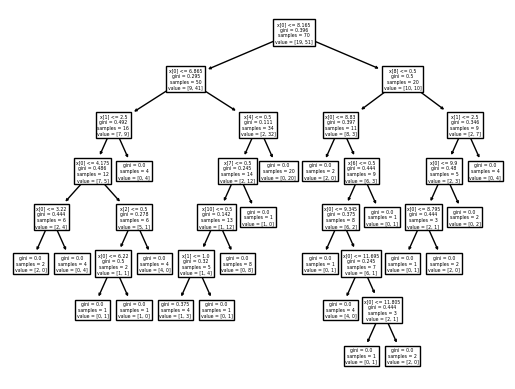

In [ ]:


tree.plot_tree(clf);

In [ ]:
fn = ['AI_RANKING', 'ASSAY', 'CIRCUIT_INTER',
       'CONDITION', 'GENE_EXPRESSION', 'KNOWLEDGE_INTER', 'PHENOTYPE',
       'SIDE_EFFECTS', 'SYMPTOM', 'TARGET', 'DL_11']
cn = ['0','1']

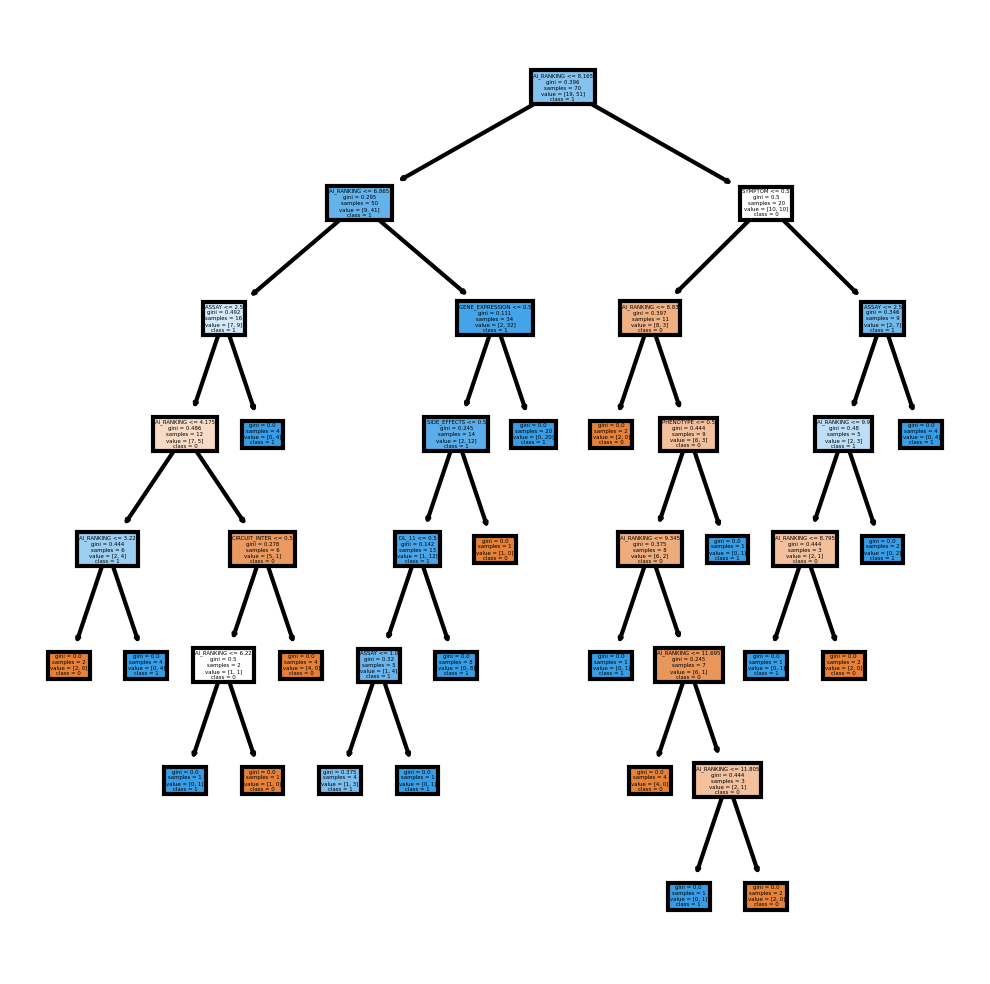

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn,
               class_names=cn,
               filled = True);

# New Section